In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('telecom_churn.csv')

FileNotFoundError: File b'telecom_churn.csv' does not exist

In [3]:
df = pd.read_csv('C:\Users\10187\Desktop\c04\telecom_churn')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-3-809943cf6e0a>, line 1)

In [4]:
df = pd.read_csv(r'C:\Users\10187\Desktop\c04\telecom_churn')

FileNotFoundError: File b'C:\\Users\\10187\\Desktop\\c04\\telecom_churn' does not exist

In [5]:
df = pd.read_csv(r'C:\Users\10187\Desktop\c04\telecom_churn.csv')

In [6]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247F1CC5E10>,
      dtype=object)

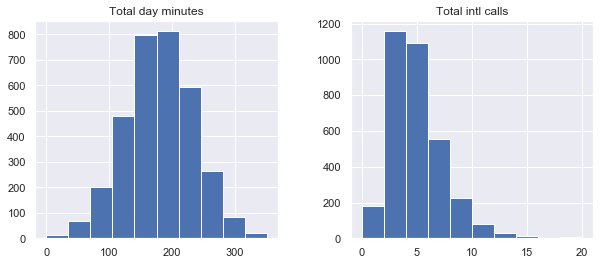

In [7]:
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(10, 4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247F1FC3B38>,
      dtype=object)

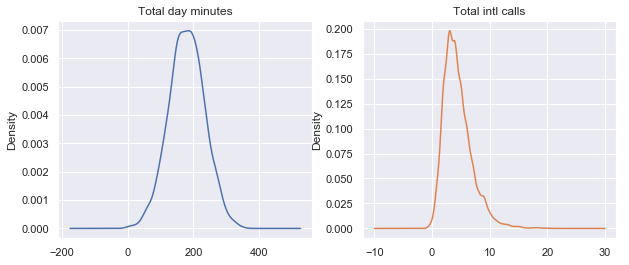

In [8]:
df[features].plot(kind='density', subplots=True, layout=(1, 2),
                  sharex=False, figsize=(10, 4), legend=False, title=features)

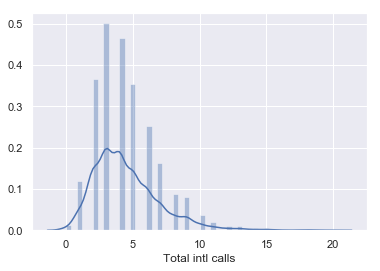

In [9]:
sns.distplot(df['Total intl calls'])

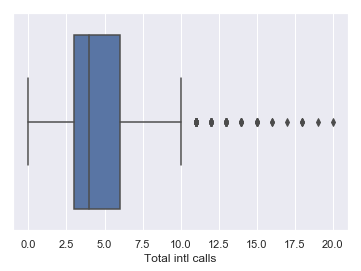

In [10]:
sns.boxplot(x='Total intl calls', data=df)

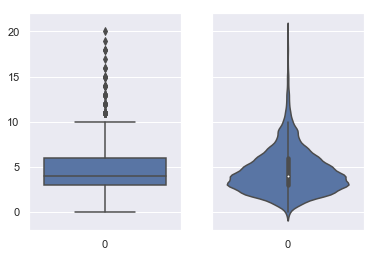

In [11]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0])
sns.violinplot(data=df['Total intl calls'], ax=axes[1])

In [12]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


In [13]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

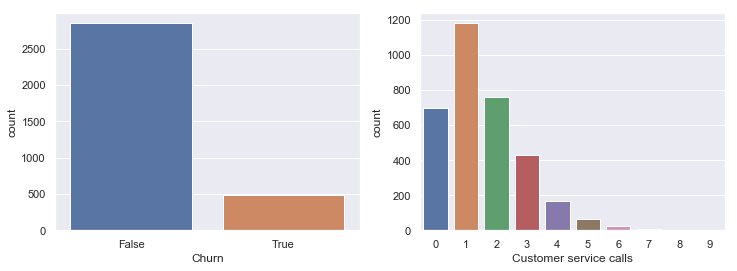

In [14]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df, ax=axes[0])
sns.countplot(x='Customer service calls', data=df, ax=axes[1])

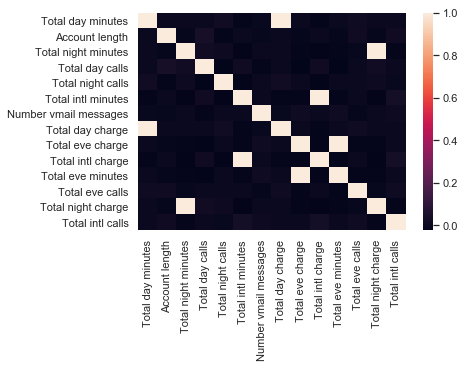

In [15]:
# 丢弃非数值变量
numerical = list(set(df.columns) -
                 set(['State', 'International plan', 'Voice mail plan',
                      'Area code', 'Churn', 'Customer service calls']))
# 计算和绘图
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

In [16]:
numerical = list(set(numerical) - set(['Total day charge', 'Total eve charge', 
                                       'Total night charge', 'Total intl charge']))

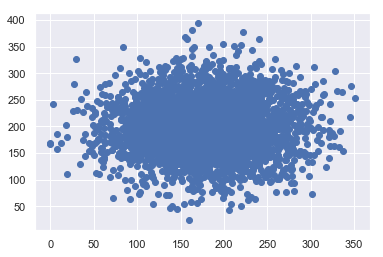

In [17]:
plt.scatter(df['Total day minutes'], df['Total night minutes'])

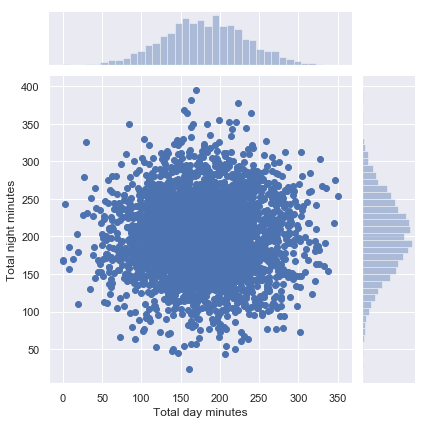

In [18]:
sns.jointplot(x='Total day minutes', y='Total night minutes',
              data=df, kind='scatter')

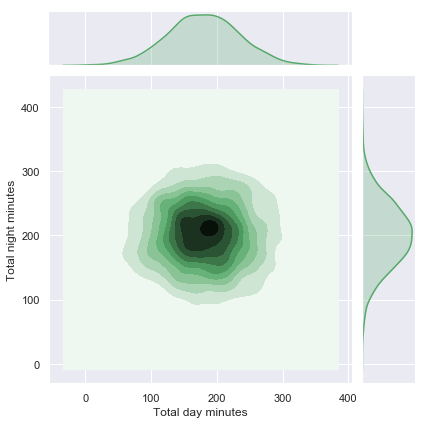

In [19]:
sns.jointplot('Total day minutes', 'Total night minutes', data=df,
              kind="kde", color="g")

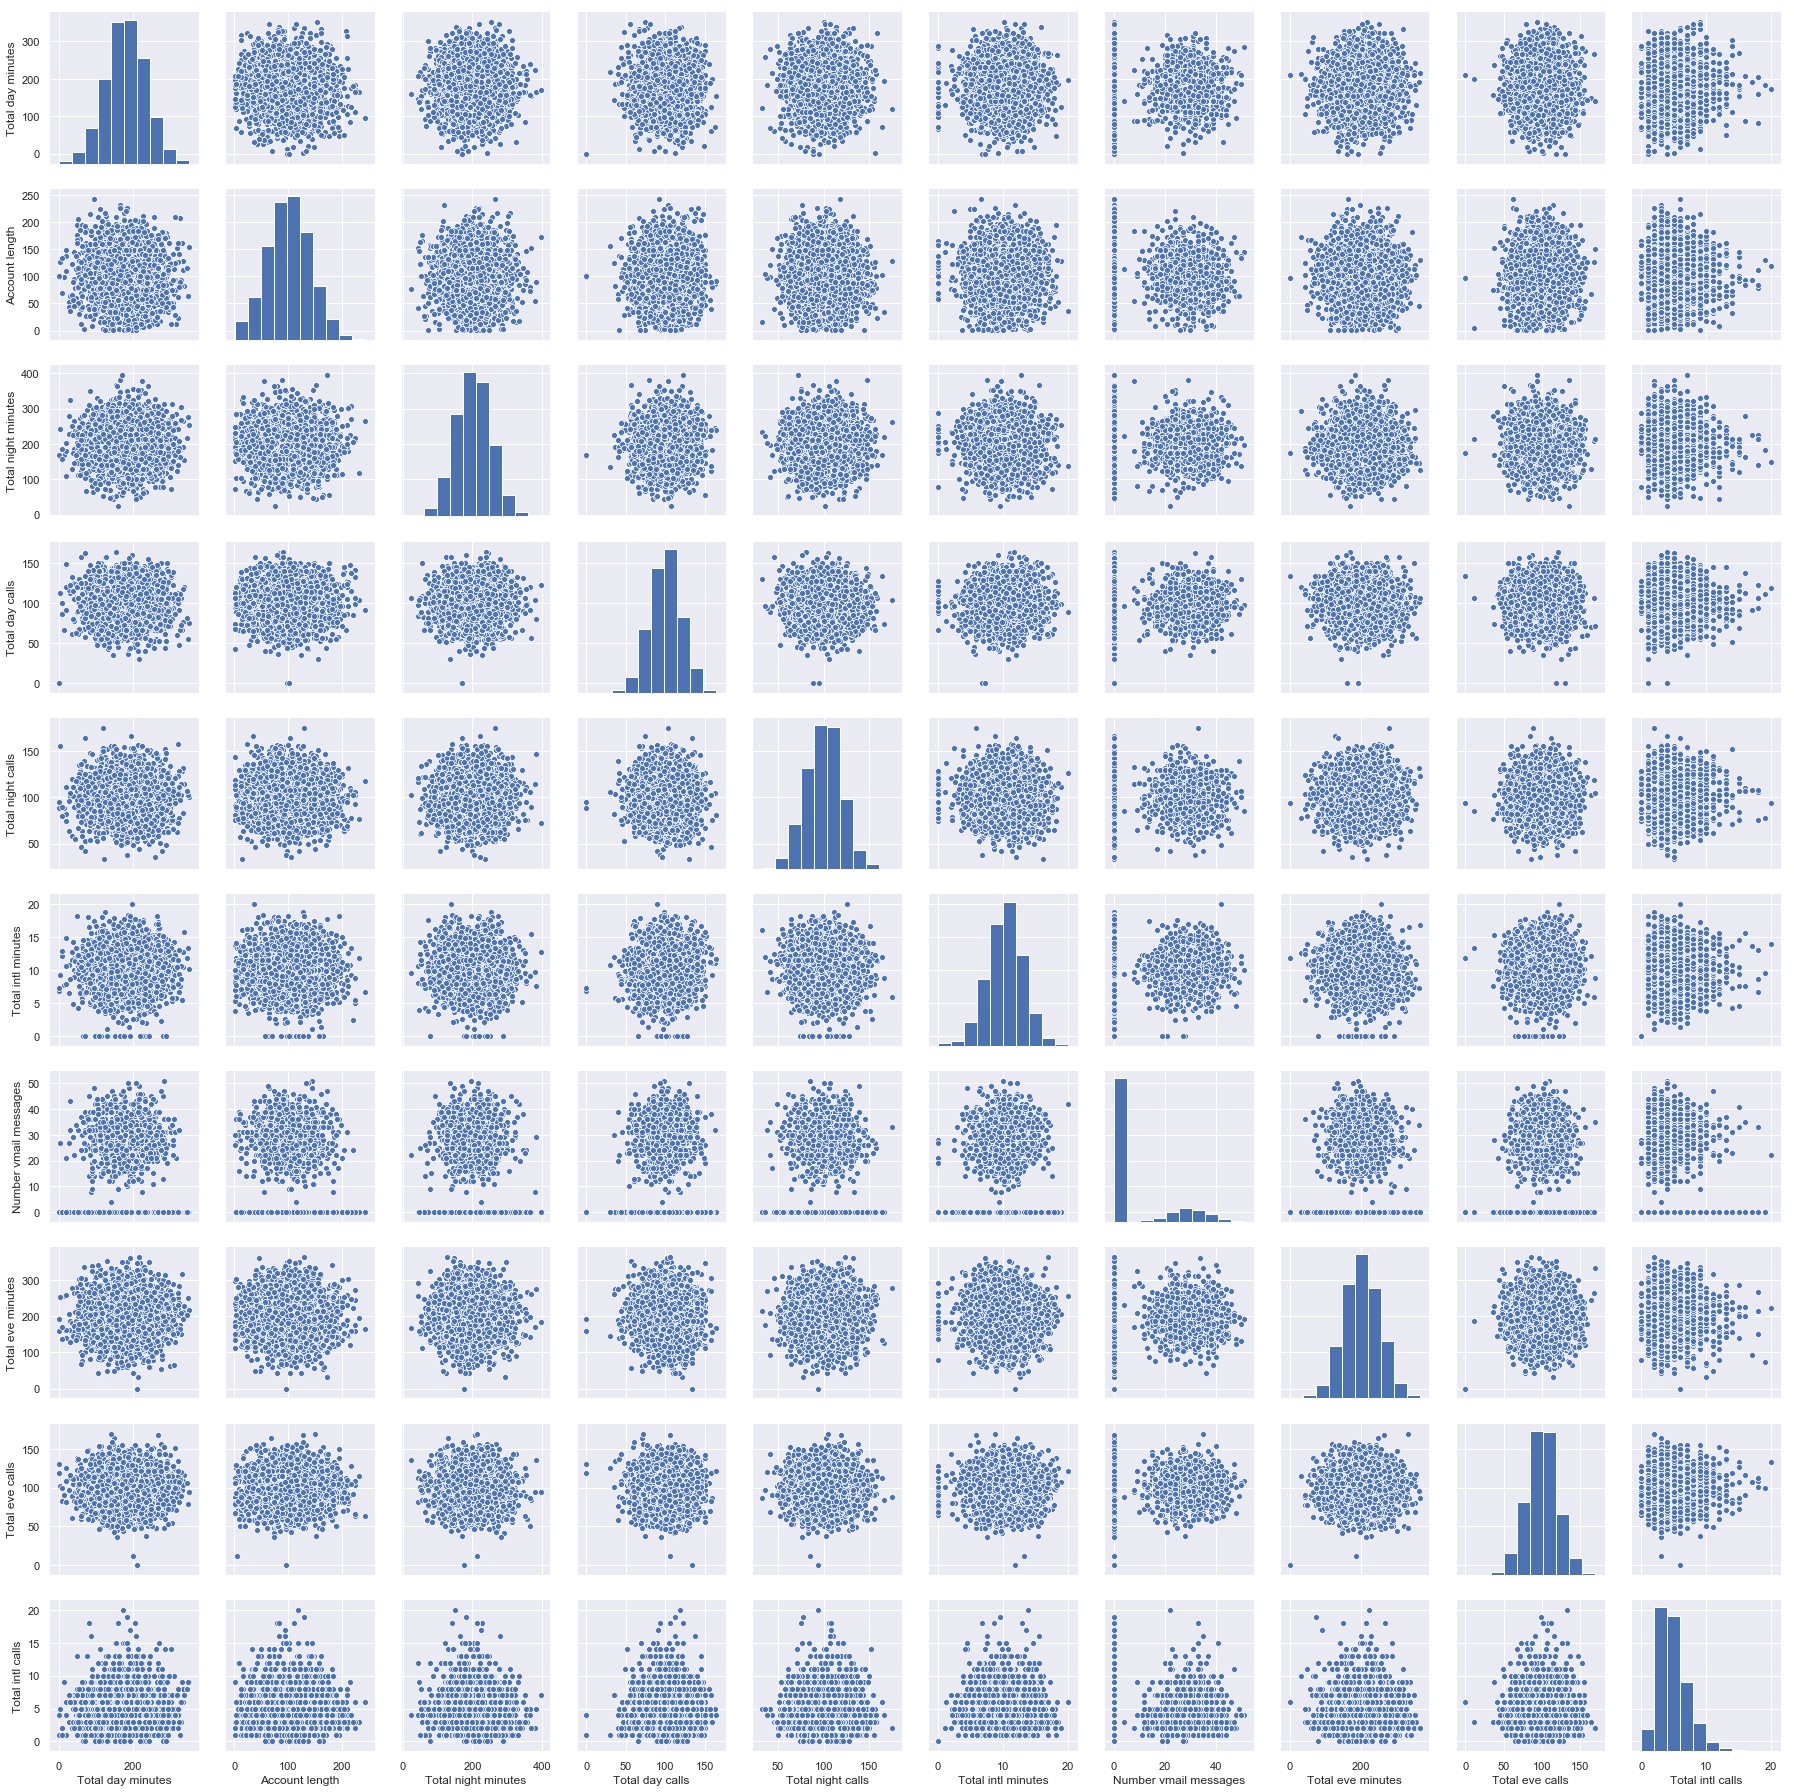

In [20]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical])

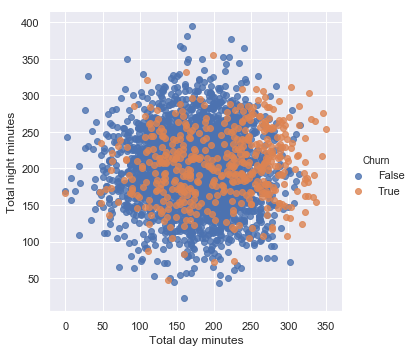

In [21]:
sns.lmplot('Total day minutes', 'Total night minutes',
           data=df, hue='Churn', fit_reg=False)

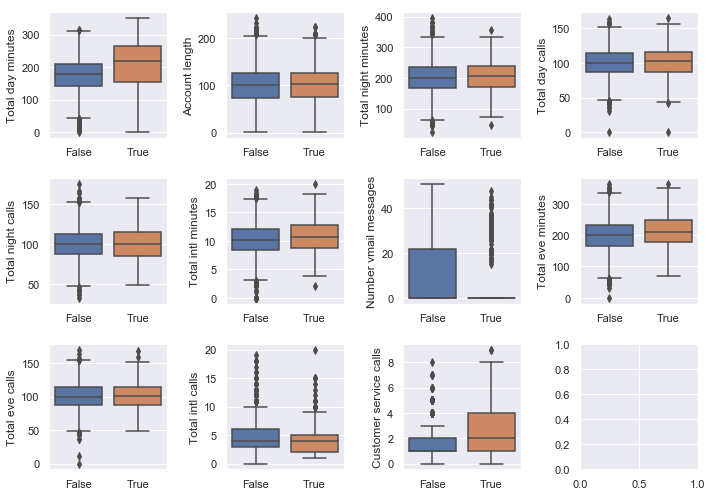

In [22]:
# 有时我们可以将有序变量作为数值变量分析
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout()

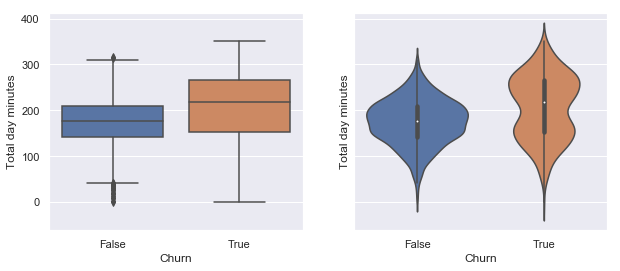

In [23]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0])
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1])

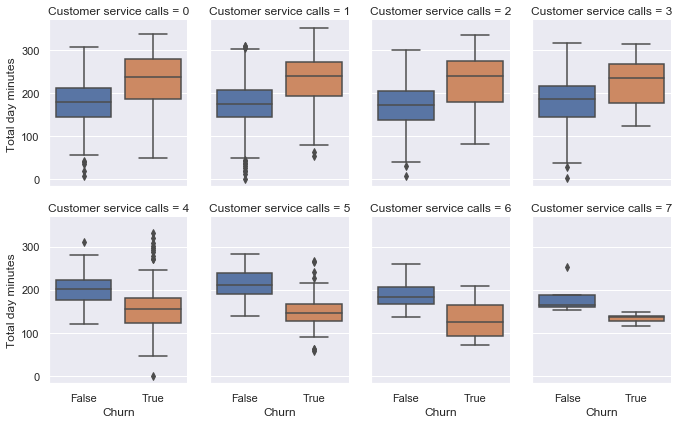

In [24]:
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
            data=df[df['Customer service calls'] < 8], kind="box",
            col_wrap=4, height=3, aspect=.8)

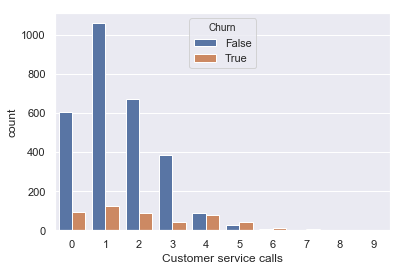

In [25]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)

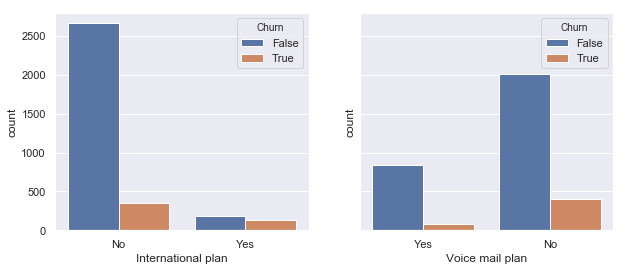

In [26]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0])
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1])

In [27]:
pd.crosstab(df['State'], df['Churn']).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


In [28]:
df.groupby(['State'])['Churn'].agg(
    [np.mean]).sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


In [29]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [30]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

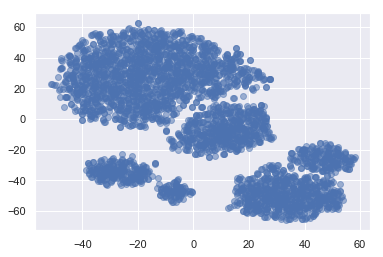

In [39]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5)

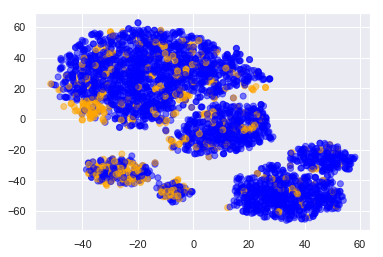

In [40]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.5)

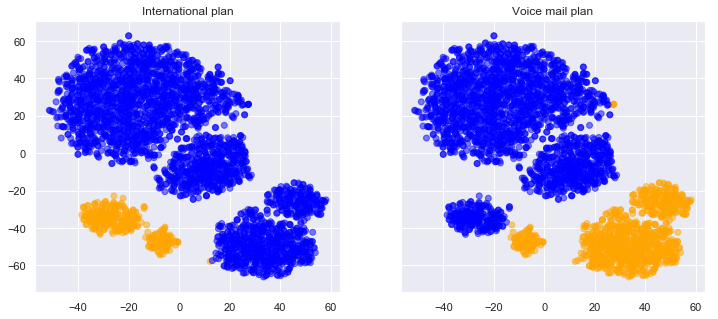

In [41]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1],
                    c=df[name].map({'Yes': 'orange', 'No': 'blue'}), alpha=.5)
    axes[i].set_title(name)